In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Задание 1

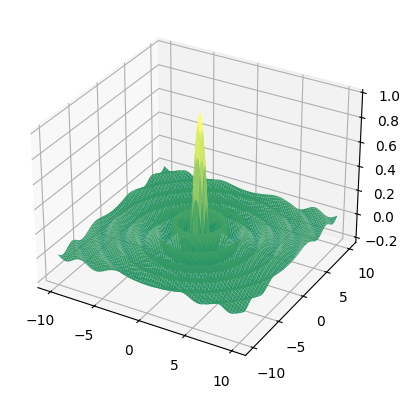

In [12]:
x,z = np.meshgrid(np.linspace(-10,10,400), np.linspace(-10,10,400))

y = np.sinc(np.hypot(x,z))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x,z,y, rstride=5, cstride=5,cmap=cm.summer)
plt.show()

# Задание 2

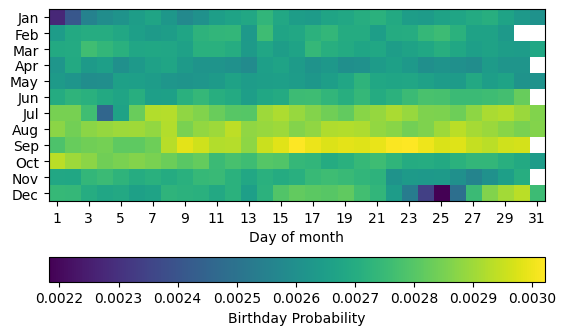

In [11]:
DAYS_PER_MONTH = [31,29,31,30,31,30,31,31,30,31,30,31]

dt = np.dtype([('month',int),('day',int),('n',float)])
data = np.genfromtxt('pr10_data/birthday-data.csv', dtype=dt,delimiter=',', skip_header=1)

total = np.sum(data['n'])
heatmap = np.empty((12,31))
heatmap[:] = np.nan

for month, day, n in data:
    month_index, day_index = month - 1, day - 1
    if day > DAYS_PER_MONTH[month_index]:
        continue
    heatmap[month_index,day_index] = n / total

heatmap[1,28] *= 4

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(heatmap, interpolation='nearest')

ax.set_yticks(range(12))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax.set_xticks(range(0,31,2))
ax.set_xticklabels(['{:d}'.format(day+1) for day in days])
ax.set_xlabel('Day of month')

cbar = fig.colorbar(ax=ax, mappable=im, orientation='horizontal')
cbar.set_label('Birthday Probability')

plt.show()